# Imports

In [19]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [27]:
n = 6
label_name = "stat5"
layers = [12,16]
epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [28]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [29]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 25.043873071670532
Epoch 1, Loss 25.056395292282104
Epoch 2, Loss 24.996227979660034
Epoch 3, Loss 25.039278268814087
Epoch 4, Loss 24.98728036880493
Epoch 5, Loss 24.99127197265625
Epoch 6, Loss 24.976266622543335
Epoch 7, Loss 24.921962022781372
Epoch 8, Loss 24.91671872138977
Epoch 9, Loss 24.946659326553345
Epoch 10, Loss 24.866051197052002
Epoch 11, Loss 24.96350407600403
Epoch 12, Loss 24.866469144821167
Epoch 13, Loss 24.84300136566162
Epoch 14, Loss 24.82361936569214
Epoch 15, Loss 24.814576864242554
Epoch 16, Loss 24.809053421020508
Epoch 17, Loss 24.849397897720337
Epoch 18, Loss 24.74627423286438
Epoch 19, Loss 24.89861226081848
Epoch 20, Loss 24.715478658676147
Epoch 21, Loss 24.77759552001953
Epoch 22, Loss 24.74668860435486
Epoch 23, Loss 24.69694232940674
Epoch 24, Loss 24.757633447647095
Epoch 25, Loss 24.761731147766113
Epoch 26, Loss 24.65132713317871
Epoch 27, Loss 24.698323488235474
Epoch 28, Loss 24.669141054153442
Epoch 29, Loss 24.62750792503357
Epo

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

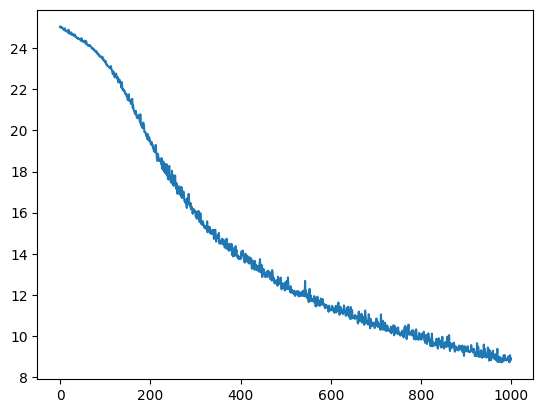

In [30]:
plt.plot(losses)

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

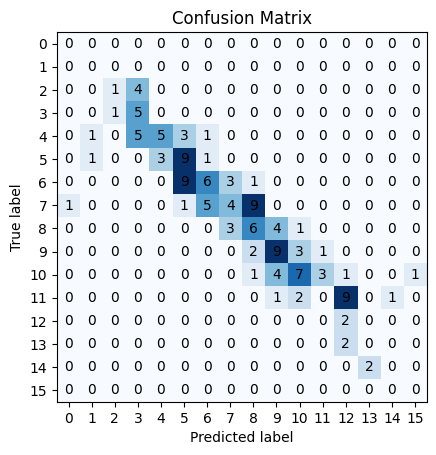

ZeroDivisionError: division by zero

In [31]:
confusion_matrix = evaluate_model(model, test_dataset)

confusion_matrix.plot()

confusion_matrix.print_accuracy()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

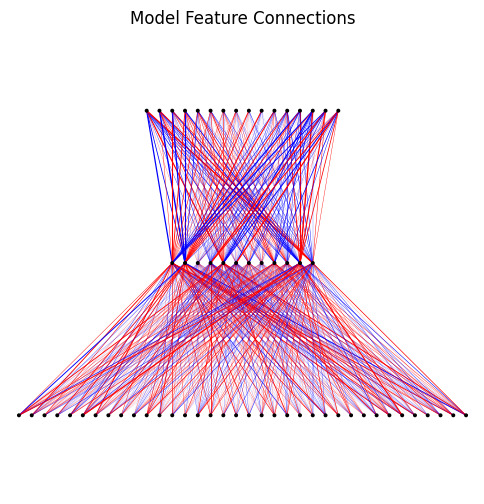

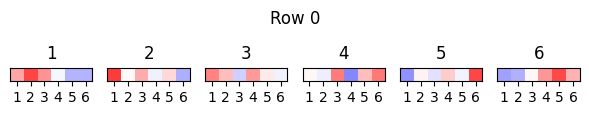

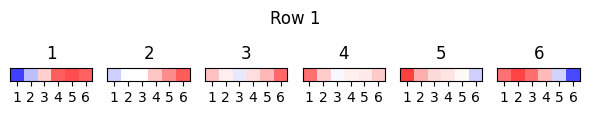

In [32]:
model.plot_connections()
model.plot_heatmap_feature(0,0)
model.plot_heatmap_feature(0,1)